In [123]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import optimizers
from tensorflow.keras import datasets
from tensorflow.keras import activations
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [101]:
# load dataset
(tmp_train_x, tmp_train_y), (tmp_test_x, tmp_test_y) = datasets.mnist.load_data()

In [102]:
# preprocessing
train_shape = tmp_train_x.shape
test_shape = tmp_test_x.shape
# normalize and add 1 channel for 4th dimension
train_x = tmp_train_x.reshape(train_shape[0], train_shape[1], train_shape[2], 1) / 255
test_x = tmp_test_x.reshape(test_shape[0], test_shape[1], test_shape[2], 1) / 255
train_y = to_categorical(tmp_train_y)
test_y = to_categorical(tmp_test_y)

In [68]:
# model initalization
def init():
    model = keras.Sequential()
    model.add(layers.Conv2D(
        10,
        (5, 5),
        input_shape =(28,28,1),
        strides=1,
        kernel_initializer="he_uniform",
        activation='relu'
    )) # 24 x 24 output
    model.add(layers.MaxPooling2D(
        pool_size=(2,2)
    )) # 12 x 12 output
    model.add(layers.Flatten())
    model.add(layers.Dense(25, activation = 'relu', kernel_initializer='he_uniform'))
    model.add(layers.Dense(10, activation = 'softmax'))
    opt = optimizers.SGD(lr=.01, momentum=.9) 
    model.compile(optimizer=opt, loss="categorical_crossentropy", metrics=['accuracy'])
    return model
init().summary()

Model: "sequential_48"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_23 (Conv2D)           (None, 24, 24, 10)        260       
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 12, 12, 10)        0         
_________________________________________________________________
flatten_9 (Flatten)          (None, 1440)              0         
_________________________________________________________________
dense_58 (Dense)             (None, 25)                36025     
_________________________________________________________________
dense_59 (Dense)             (None, 10)                260       
Total params: 36,545
Trainable params: 36,545
Non-trainable params: 0
_________________________________________________________________


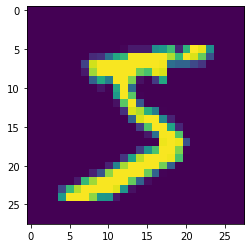

In [95]:
plt.imshow(train_x[0])

In [155]:
model = init()
print(train_x.shape)
history = model.fit(train_x, train_y, batch_size=1000, epochs=10, validation_data=(test_x, test_y), verbose=2) 


(60000, 28, 28, 1)
Epoch 1/10
60/60 - 8s - loss: 0.9614 - accuracy: 0.7060 - val_loss: 0.3617 - val_accuracy: 0.8920
Epoch 2/10
60/60 - 7s - loss: 0.3313 - accuracy: 0.9014 - val_loss: 0.2725 - val_accuracy: 0.9192
Epoch 3/10
60/60 - 7s - loss: 0.2683 - accuracy: 0.9211 - val_loss: 0.2357 - val_accuracy: 0.9299
Epoch 4/10
60/60 - 7s - loss: 0.2311 - accuracy: 0.9320 - val_loss: 0.2067 - val_accuracy: 0.9401
Epoch 5/10
60/60 - 7s - loss: 0.2042 - accuracy: 0.9407 - val_loss: 0.1852 - val_accuracy: 0.9450
Epoch 6/10
60/60 - 7s - loss: 0.1802 - accuracy: 0.9479 - val_loss: 0.1641 - val_accuracy: 0.9511
Epoch 7/10
60/60 - 7s - loss: 0.1619 - accuracy: 0.9529 - val_loss: 0.1483 - val_accuracy: 0.9551
Epoch 8/10
60/60 - 7s - loss: 0.1468 - accuracy: 0.9574 - val_loss: 0.1347 - val_accuracy: 0.9609
Epoch 9/10
60/60 - 7s - loss: 0.1342 - accuracy: 0.9608 - val_loss: 0.1232 - val_accuracy: 0.9633
Epoch 10/10
60/60 - 7s - loss: 0.1236 - accuracy: 0.9645 - val_loss: 0.1167 - val_accuracy: 0.9649


In [118]:
d = dir
d(history)
plt.history.history['loss']
history.history['accuracy']
history.history['val_loss']
history.history['val_accuracy']

[0.8913999795913696,
 0.9203000068664551,
 0.9315999746322632,
 0.9417999982833862,
 0.9505000114440918]

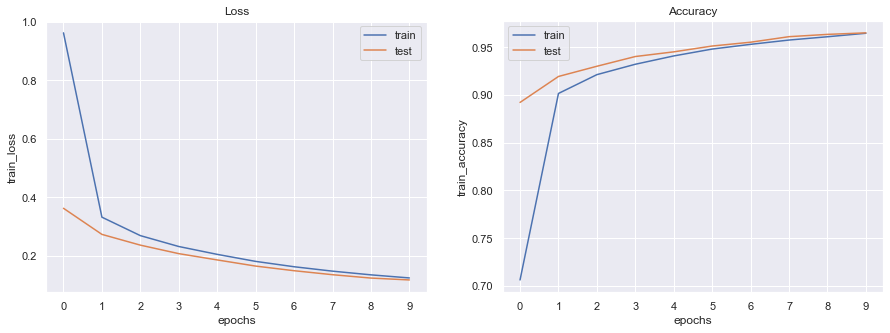

In [194]:
sns.set_theme()
hist = history.history
fig, axis = plt.subplots(1, 2)
x = [i for i in range(len(hist['loss']))]
df = pd.DataFrame({"x":x,
                   "train_loss":hist['loss'],
                   "test_loss":hist["val_loss"],
                   "train_accuracy":hist["accuracy"],
                   "test_accuracy":hist["val_accuracy"]})
p1 = sns.lineplot(ax=axis[0], data=df, x="x", y="train_loss", label="train")
sns.lineplot(ax = axis[0], data=df, x="x", y="test_loss", label="test")
p1.set(
    xticks=x,
    title="Loss",
    xlabel="epochs",
)

p2 = sns.lineplot(ax=axis[1], data=df, x="x", y="train_accuracy", label="train")
sns.lineplot(ax = axis[1], data=df, x="x", y="test_accuracy", label="test")
p2.set(
    xticks=x,
    title="Accuracy",
    xlabel="epochs",
)
fig.set_figheight(5)
fig.set_figwidth(15)
p1.legend(loc="upper right")
pass

In [197]:
np.amax(model(test_x[0:1])

<tf.Tensor: shape=(1, 10), dtype=float32, numpy=
array([[2.1590874e-06, 1.1696140e-07, 7.8624857e-05, 2.7923807e-04,
        5.0126469e-06, 1.1272241e-05, 1.2514567e-09, 9.9950719e-01,
        1.3951927e-06, 1.1493049e-04]], dtype=float32)>